Load data
Separate metadata
Set up model
train model
Evaluate model

In [1]:
import pathlib
import warnings

import pandas as pd
import statsmodels.formula.api as smf

warnings.filterwarnings("ignore")  # Ignore all warnings
warnings.simplefilter("ignore")  # Additional suppression method

try:
    cfg = get_ipython().config
    in_notebook = True
except NameError:
    in_notebook = False
if in_notebook:
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm
# Get the current working directory
cwd = pathlib.Path.cwd()

if (cwd / ".git").is_dir():
    root_dir = cwd

else:
    root_dir = None
    for parent in cwd.parents:
        if (parent / ".git").is_dir():
            root_dir = parent
            break

# Check if a Git root directory was found
if root_dir is None:
    raise FileNotFoundError("No Git root directory found.")

In [2]:
sc_profile_data_path = pathlib.Path(
    f"{root_dir}/data/all_patient_profiles/sc_profiles.parquet"
).resolve(strict=True)
sc_df = pd.read_parquet(sc_profile_data_path)
sc_df.head()

,patient,object_id,unit,dose,treatment,Target,Class,Therapeutic Categories,image_set,Well,...,Texture_Cytoplasm_Mito_Difference.Entropy_256.3,Texture_Cytoplasm_Mito_Difference.Variance_256.3,Texture_Cytoplasm_Mito_Entropy_256.3,Texture_Cytoplasm_Mito_Information.Measure.of.Correlation.1_256.3,Texture_Cytoplasm_Mito_Information.Measure.of.Correlation.2_256.3,Texture_Cytoplasm_Mito_Inverse.Difference.Moment_256.3,Texture_Cytoplasm_Mito_Sum.Average_256.3,Texture_Cytoplasm_Mito_Sum.Entropy_256.3,Texture_Cytoplasm_Mito_Sum.Variance_256.3,Texture_Cytoplasm_Mito_Variance_256.3
0,NF0014,25,uM,10,Mirdametinib,MEK1/2 inhibitor,Small Molecule,Kinase Inhibitor,G8-1,G8,...,0.076564,0.020575,0.033899,0.378940,0.274566,0.024535,0.009685,0.034226,0.132669,0.157663
1,NF0014,51,uM,10,Mirdametinib,MEK1/2 inhibitor,Small Molecule,Kinase Inhibitor,G8-1,G8,...,0.143096,-0.020886,0.093548,-0.170211,0.573598,-0.012530,0.078748,0.097408,0.197211,0.205372
2,NF0014,76,uM,10,Mirdametinib,MEK1/2 inhibitor,Small Molecule,Kinase Inhibitor,G8-1,G8,...,0.016383,0.054972,-0.007522,0.174039,0.198937,0.057107,-0.067183,-0.011351,-0.025754,-0.015079
3,NF0014,102,uM,10,Mirdametinib,MEK1/2 inhibitor,Small Molecule,Kinase Inhibitor,G8-1,G8,...,-0.228797,0.180670,-0.193310,0.601983,-0.545280,0.170874,-0.320329,-0.210690,-0.502716,-0.508395
4,NF0014,127,uM,10,Mirdametinib,MEK1/2 inhibitor,Small Molecule,Kinase Inhibitor,G8-1,G8,...,-0.117688,0.123971,-0.108999,-0.148890,-0.076024,0.120146,-0.181596,-0.118077,-0.224879,-0.235531


In [3]:
metadata_wells = [
    "patient",
    "object_id",
    "unit",
    "dose",
    "Target",
    "Class",
    "Therapeutic Categories",
    "image_set",
    "Well",
]

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    PrecisionRecallDisplay,
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

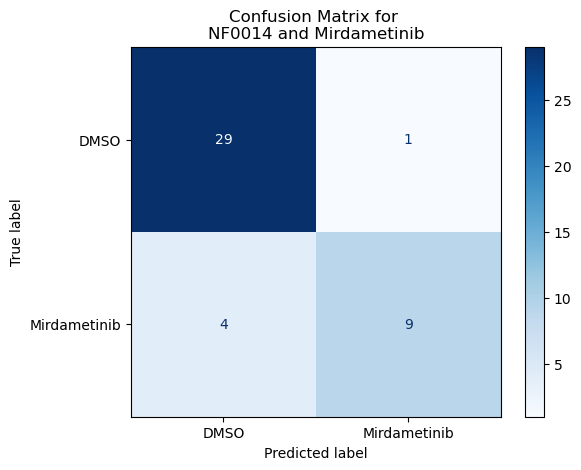

Error processing patient NF0014 with treatment Fimepinostat: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
Error processing patient NF0014 with treatment Staurosporine: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.


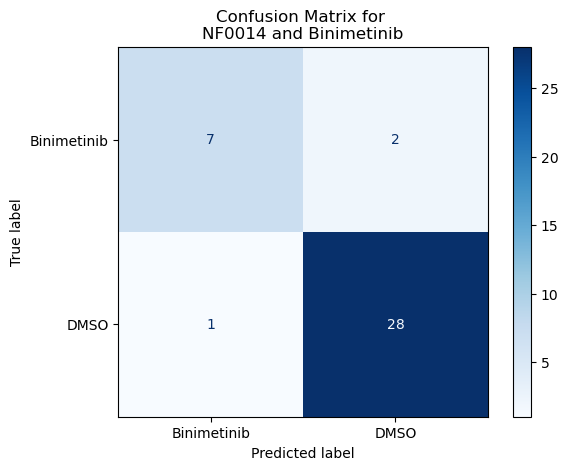

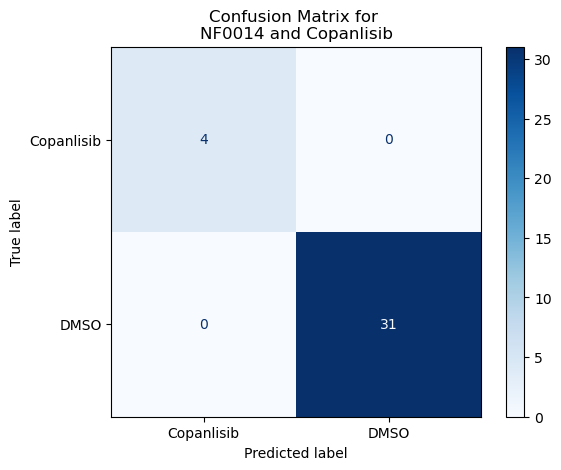

Error processing patient NF0014 with treatment Selumetinib: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
Error processing patient NF0014 with treatment Cabozantinib: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
Error processing patient NF0014 with treatment DMSO: 
All the 120 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/l

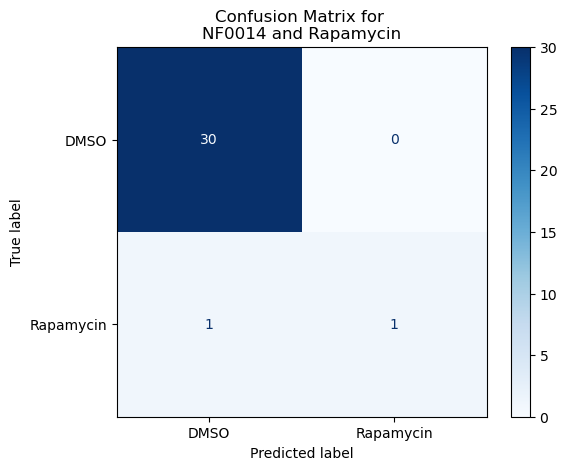

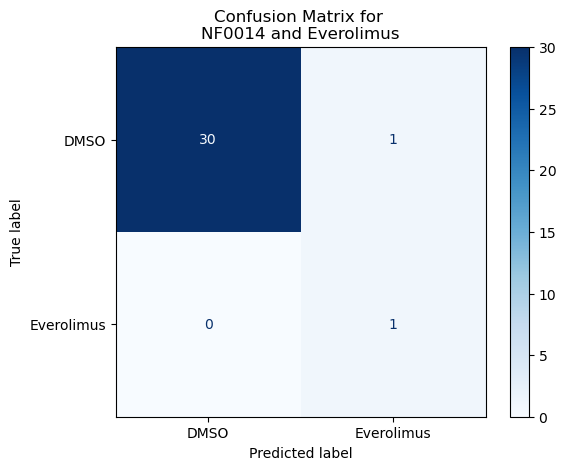

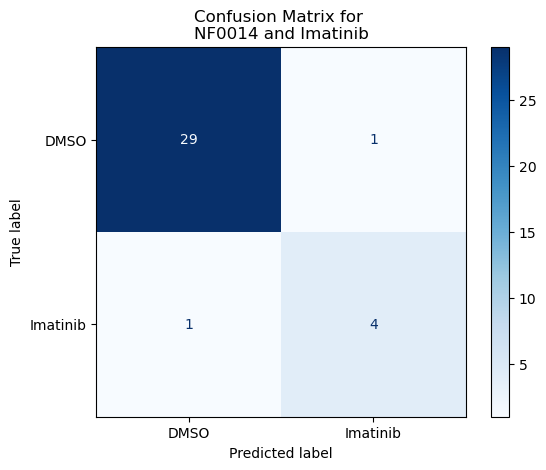

Error processing patient NF0014 with treatment Nilotinib: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.


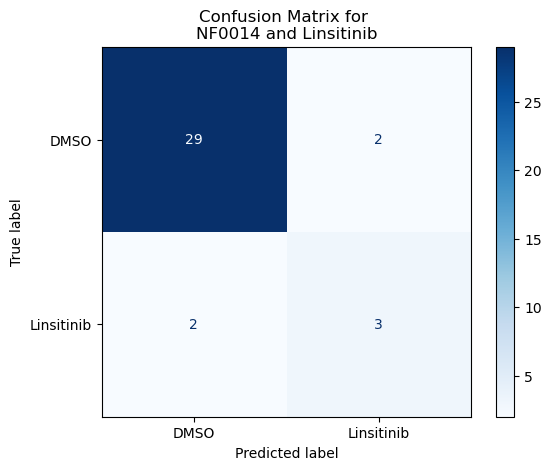

Error processing patient NF0014 with treatment Digoxin: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.


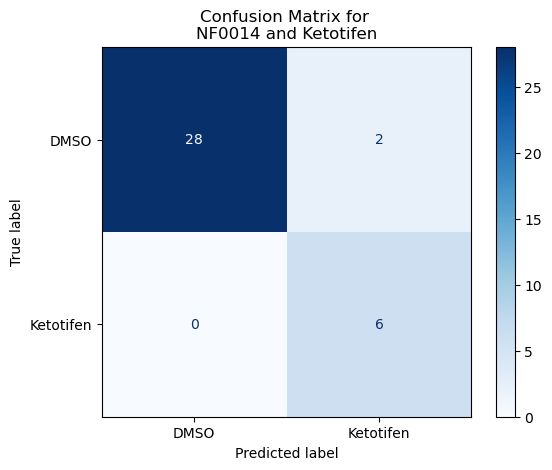

Error processing patient NF0014 with treatment Trametinib: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.


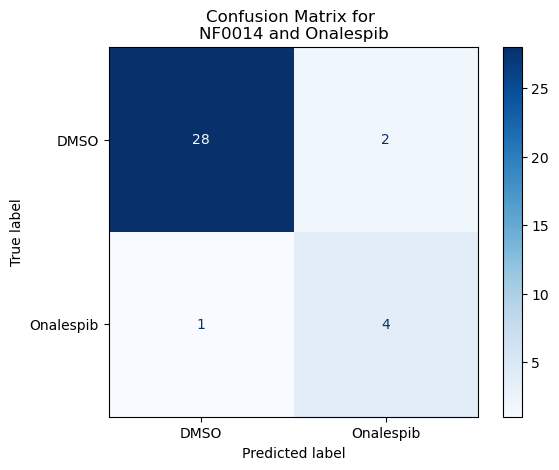

In [6]:
patients = sc_df["patient"].unique().tolist()

for patient_id in patients[:1]:
    sc_df_patient = sc_df[sc_df["patient"] == patient_id]
    treatments = sc_df_patient["treatment"].unique().tolist()
    for treatment_id in treatments:
        drugs_to_select = [treatment_id, "DMSO"]
        sc_df_patient_drug = sc_df_patient[
            sc_df_patient["treatment"].isin(drugs_to_select)
        ]
        metadata_df = (
            sc_df_patient_drug[metadata_wells].drop_duplicates().reset_index(drop=True)
        )
        features_df = (
            sc_df_patient_drug.drop(columns=metadata_wells)
            .drop_duplicates()
            .reset_index(drop=True)
        )
        features_df.dropna(inplace=True)

        # Separate features (X) and target (y)
        X = features_df.drop(columns=["treatment", "parent_organoid"])
        y = features_df["treatment"]
        parent_organoid = features_df["parent_organoid"]

        # Train-test split
        try:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=0, stratify=parent_organoid
            )

            # Pipeline: scaling + logistic regression
            pipeline = Pipeline(
                [
                    ("scaler", StandardScaler()),
                    ("logreg", LogisticRegression(solver="saga", max_iter=5000)),
                ]
            )

            # Define parameter grid
            param_grid = {
                "logreg__penalty": ["elasticnet"],
                "logreg__l1_ratio": np.linspace(0, 1, 6),  # 0, 0.2, 0.4, 0.6, 0.8, 1
                "logreg__C": [0.01, 0.1, 1, 10],  # Regularization strength
            }

            # Grid search with 5-fold CV
            grid = GridSearchCV(
                pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1
            )
            grid.fit(X_train, y_train)

            # print("Best parameters:", grid.best_params_)
            # print("Best CV accuracy:", grid.best_score_)

            # evaluate on the test set
            y_pred = grid.predict(X_test)
            # print("Test set accuracy:", grid.score(X_test, y_test))
            # print("Classification report:\n", classification_report(y_test, y_pred))
            # print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

            grid.predict(X_test)
            # print("Test set accuracy:", grid.score(X_test, y_test))
            # print("Classification report:\n", classification_report(y_test, y_pred))
            # print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
            # get the best model coefficients
            best_model = grid.best_estimator_
            coefficients = best_model.named_steps["logreg"].coef_
            feature_names = X.columns
            coef_df = pd.DataFrame(coefficients, columns=feature_names)
            coef_df = coef_df.T.reset_index()
            coef_df.columns = ["Feature", "Coefficient"]
            # plot the confusion matrix

            cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
            disp = ConfusionMatrixDisplay(
                confusion_matrix=cm, display_labels=grid.classes_
            )
            disp.plot(cmap=plt.cm.Blues)
            plt.title(f"Confusion Matrix for \n{patient_id} and {treatment_id}")
            plt.show()
            # plot the precision-recall curve

            # y_test_binarized = (y_test == "Mirdametinib").astype(int)
            # y_score = grid.predict_proba(X_test)[:, 1]  # Probability of the
            # precision, recall, _ = precision_recall_curve(y_test_binarized, y_score)
            # PrecisionRecallDisplay(precision=precision, recall=recall).plot()
            # plt.title("Precision-Recall Curve")
            # plt.show()
        except ValueError as e:
            print(
                f"Error processing patient {patient_id} with treatment {treatment_id}: {e}"
            )
            continue